# Wstęp do Multimediów
### Laboratorium 1
Łukasz Jaremek

310710

---

# Zadanie 1

Dane są dwa sygnały o okresie podstawowym N = 4: s<sub>1</sub> = {2, 3, 1, 0} i s<sub>2</sub> = {0, 3, 1, 0}.

a) Dla każdego sygnału wyznaczyć i wykreślić widmo amplitudowe i fazowe, obliczyć moc sygnału i sprawdzić słuszność twierdzenia Parsevala.

b) Sprawdzić słuszność twierdzenia o dyskretnej transformacji Fouriera splotu kołowego sygnału s<sub>1</sub> i s<sub>2</sub> : wyznaczyć ręcznie splot kołowy sygnałów s<sub>1</sub> i s<sub>2</sub>, a następnie wyznaczyć ten splot ponownie za pomocą dyskretnej transormacji Fouriera.

In [24]:
N = 4
s1 = (2, 3, 1, 0)
s2 = (0, 3, 1, 0)


## Obliczanie dyskretnej transformaty Fouriera, widmo amplitudowe oraz widmo fazowe dla obu sygnałów

In [25]:
import numpy as np

dft_s1 = np.fft.fft(s1, N)  # Discrete Fourier Transform
amplitude_spectrum_s1 = [np.abs(number) for number in dft_s1]
phase_spectrum_s1 = [np.angle(number) for number in dft_s1]

dft_s2 = np.fft.fft(s2, N)  # Discrete Fourier Transform
amplitude_spectrum_s2 = [np.abs(number) for number in dft_s2]
phase_spectrum_s2 = [np.angle(number) for number in dft_s2]


## Wyświetlanie widm amplitudowych dla obu sygnałów

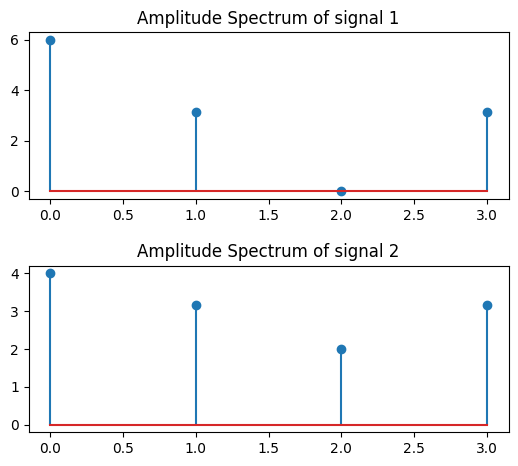

In [26]:
import matplotlib.pyplot as plt

x_ticks = list(range(len(amplitude_spectrum_s1)))

fig, axs = plt.subplots(2)
axs[0].stem(x_ticks, amplitude_spectrum_s1)
axs[0].title.set_text("Amplitude Spectrum of signal 1")
axs[1].stem(x_ticks, amplitude_spectrum_s2)
axs[1].title.set_text("Amplitude Spectrum of signal 2")

plt.subplots_adjust(left=0.1,
                    bottom=0.0,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)



## Wyświetlanie widm fazowych dla obu sygnałów

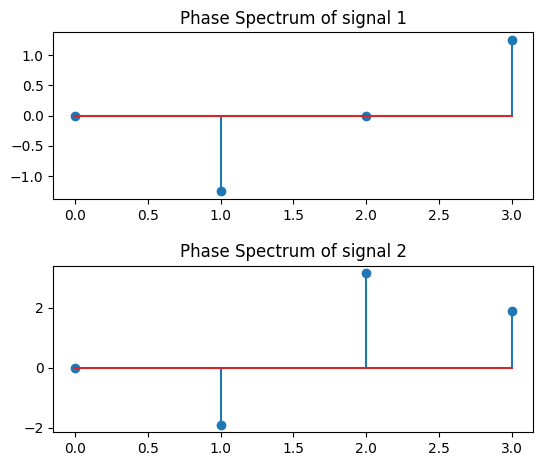

In [27]:
x_ticks = list(range(len(phase_spectrum_s1)))

fig, axs = plt.subplots(2)
axs[0].stem(x_ticks, phase_spectrum_s1)
axs[0].title.set_text("Phase Spectrum of signal 1")
axs[1].stem(x_ticks, phase_spectrum_s2)
axs[1].title.set_text("Phase Spectrum of signal 2")

plt.subplots_adjust(left=0.1,
                    bottom=0.0,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)


## Obliczanie i porównywanie mocy sygnałów i sprawdzanie słuszności twierdzenia Parsevala przy użyciu wzorów:

 $\displaystyle \frac{1} {N}$ $\sum_{n=0}^{N-1} |x(n)|^2$ = $\displaystyle \frac{1} {N^2}$ $\sum_{k=0}^{N-1} |X(k)|^2$

In [28]:
s1_power_value = 0
for value in dft_s1:
    s1_power_value += np.abs(value)**2
s1_power_value /= len(dft_s1)**2

s1_power_tranform = 0
for value in s1:
    s1_power_tranform += np.abs(value)**2
s1_power_tranform /= len(s1)

print("Moc s1 z transformaty:", s1_power_tranform)
print("Moc s1 z Fouriera:", s1_power_tranform)


Moc s1 z transformaty: 3.5
Moc s1 z Fouriera: 3.5


In [29]:
s2_power_value = 0
for value in dft_s2:
    s2_power_value += np.abs(value)**2
s2_power_value /= len(dft_s1)**2

s2_power_tranform = 0
for value in s2:
    s2_power_tranform += np.abs(value)**2
s2_power_tranform /= len(s1)

print("Moc s2 z transformaty:", s2_power_tranform)
print("Moc s2 z Fouriera:", s2_power_tranform)


Moc s2 z transformaty: 2.5
Moc s2 z Fouriera: 2.5


O obu przypadkach moce są sobie równe, co świadczy o prawdziwości twierdzenia.



## Sprawdzanie twierdzenia o dyskretnej transformacji Fouriera splotu kołowego sygnałów.

Wzór na splot kołowy:

$2y(n) + 3y(n-1) + 1y(n-2) + 0y(n-3) = 2y(n) + 3y(n-1) + y(n-2)$

Dla kolejnych n:
- $n=0:$ $2y(0) + 3y(3) + y(2) = 1$
- $n=1:$ $2y(1) + 3y(0) + y(3) = 6$
- $n=2:$ $2y(2) + 3y(1) + y(0) = 11$
- $n=3:$ $2y(3) + 3y(2) + y(1) = 6$


In [30]:
print("Iloczyn transfromat:", str(np.multiply(dft_s1, dft_s2))[1:-1])
print("Transformata splotu:", str(np.fft.fft([1, 6, 11, 6]))[1:-1])

Iloczyn transfromat:  24.+0.j -10.+0.j  -0.+0.j -10.+0.j
Transformata splotu:  24.+0.j -10.+0.j   0.+0.j -10.+0.j


Wartości są sobie równe co świadczy o prawdziwości twierdzenia.

---

# Zadanie 2

Zbadać wpływ przesunięcia w czasie na postać widma amplitudowego i widma fazowego dyskretnego sygnału harmonicznego

$s[n]$ = $A$ sin(2π $\frac{n} {N}$)

o amplitudzie $A$ = 2 i okresie podstawowym $N$ = 88.

W tym celu dla każdej wartości $ n_0 \in \{0, \frac{N}{4}, \frac{N}{2}, \frac{3N}{4}\}$ wykreślić widmo amplitudowe i fazowe przesuniętego sygnału $s[n-n_0]$. Skomentować otrzymane wyniki.

-1.5707963267948968


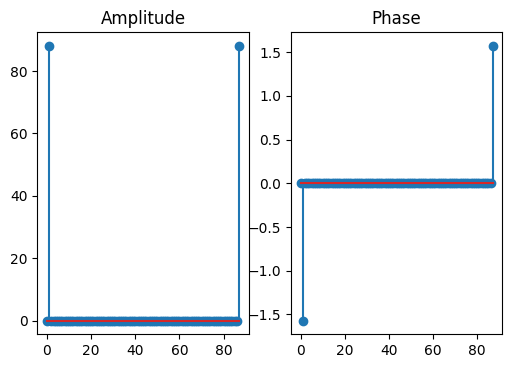

In [45]:
from math import sin, pi

n_list = list(range(88))
values = [2*sin(2*pi*(the_n-0)/88) for the_n in n_list]
dft = np.fft.fft(values)

amplitude = [np.abs(number) for number in dft]
phase = [np.angle(number)
         if round(amplitude[index], 0) != 0 else 0
         for index, number in enumerate(dft)]
print(phase[1])

fig, axs = plt.subplots(1, 2)
axs[0].stem(n_list, amplitude)
axs[0].title.set_text("Amplitude")
axs[1].stem(n_list, phase)
axs[1].title.set_text("Phase")

plt.rcParams["figure.dpi"] = 100


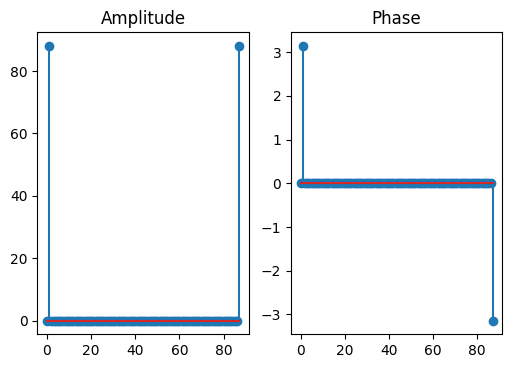

In [46]:
n_list = list(range(88))
values = [2*sin(2*pi*(the_n-88/4)/88) for the_n in n_list]
dft = np.fft.fft(values)

amplitude = [np.abs(number) for number in dft]
phase = [np.angle(number)
         if round(amplitude[index], 0) != 0 else 0
         for index, number in enumerate(dft)]

fig, axs = plt.subplots(1, 2)
axs[0].stem(n_list, amplitude)
axs[0].title.set_text("Amplitude")
axs[1].stem(n_list, phase)
axs[1].title.set_text("Phase")

plt.rcParams["figure.dpi"] = 100


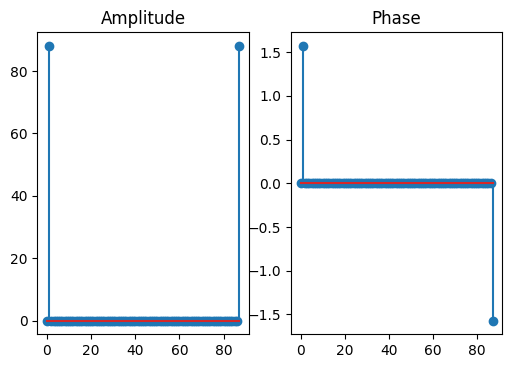

In [47]:
from math import sin, pi

n_list = list(range(88))
values = [2*sin(2*pi*(the_n-(88/2))/88) for the_n in n_list]
dft = np.fft.fft(values)

amplitude = [np.abs(number) for number in dft]
phase = [np.angle(number)
         if round(amplitude[index], 0) != 0 else 0
         for index, number in enumerate(dft)]

fig, axs = plt.subplots(1, 2)
axs[0].stem(n_list, amplitude)
axs[0].title.set_text("Amplitude")
axs[1].stem(n_list, phase)
axs[1].title.set_text("Phase")

plt.rcParams["figure.dpi"] = 100


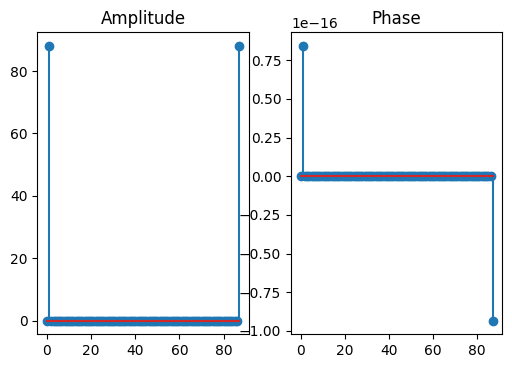

In [48]:
from math import sin, pi

n_list = list(range(88))
values = [2*sin(2*pi*(the_n-(3*88/4))/88) for the_n in n_list]
dft = np.fft.fft(values)

amplitude = [np.abs(number) for number in dft]
phase = [np.angle(number)
         if round(amplitude[index], 0) != 0 else 0
         for index, number in enumerate(dft)]

fig, axs = plt.subplots(1, 2)
axs[0].stem(n_list, amplitude)
axs[0].title.set_text("Amplitude")
axs[1].stem(n_list, phase)
axs[1].title.set_text("Phase")

plt.rcParams["figure.dpi"] = 100


Widma aplitudowe są zawsze takie same (dwa prążki po jednym na skraju) niezależnie od przesunięcia sygnału.

Natomiast widma fazowe zerujemy w miejscach, gdzie widmo amplitudowe jest równe zero, w skutek czego otrzymujemy ponownie dwa skrajne prążki.


---

# Zadanie 3

Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i fazowego dyskretnego sygnału $s[n] = A(1 - \frac{n mod(N)}{N} )$ o amplitudzie $A=4$ i okresie podstawowym $N=12$. W tym celu dla każdej wartości $ N_0 \in \{0, 1N, 4N, 9N\}$ wykreślić widmo amplitudowe i fazowe sygnału $s[n]$ dopełnionego $N_0$ zerami. Skomentować otrzymane wyniki.

## 0 zer:

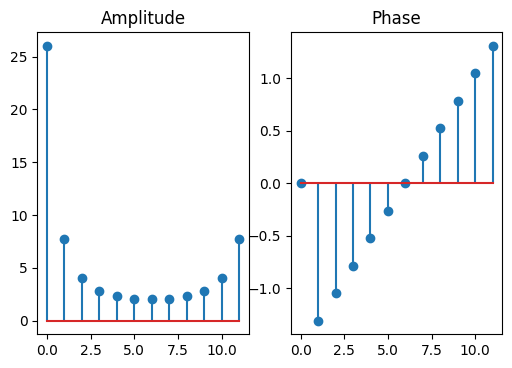

In [35]:
n_range = list(range(12))
n_list = []
for n in n_range:
    n_list.append((n%12)/12)

n_list_2 = [4*(1-n) for n in n_list]

dft = np.fft.fft(n_list_2)

amplitude = [np.abs(n) for n in dft]
phase = [np.angle(n) for n in dft]

fig, axs = plt.subplots(1, 2)
axs[0].stem(n_range, amplitude)
axs[0].title.set_text("Amplitude")
axs[1].stem(n_range, phase)
axs[1].title.set_text("Phase")

plt.rcParams["figure.dpi"] = 100


## 12 zer:

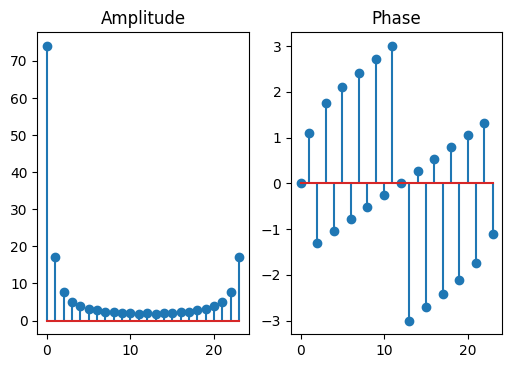

In [36]:
for _ in range(12):
    n_list.append(0)

n_list_2 = [4*(1-n) for n in n_list]

dft = np.fft.fft(n_list_2)

n_range = list(range(len(dft)))

amplitude = [np.abs(n) for n in dft]
phase = [np.angle(n) for n in dft]

fig, axs = plt.subplots(1, 2)
axs[0].stem(n_range, amplitude)
axs[0].title.set_text("Amplitude")
axs[1].stem(n_range, phase)
axs[1].title.set_text("Phase")

plt.rcParams["figure.dpi"] = 100


## 48 zer:

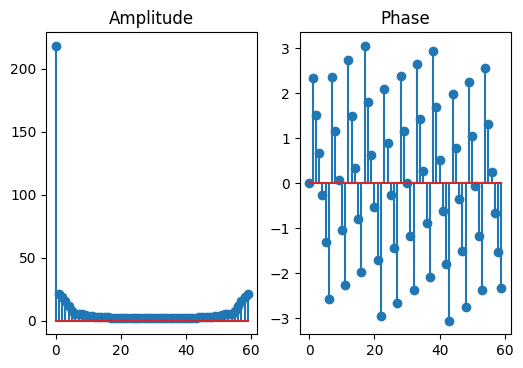

In [37]:
for _ in range(48-12):
    n_list.append(0)

n_list_2 = [4*(1-n) for n in n_list]

dft = np.fft.fft(n_list_2)

n_range = list(range(len(dft)))

amplitude = [np.abs(n) for n in dft]
phase = [np.angle(n) for n in dft]

fig, axs = plt.subplots(1, 2)
axs[0].stem(n_range, amplitude)
axs[0].title.set_text("Amplitude")
axs[1].stem(n_range, phase)
axs[1].title.set_text("Phase")

plt.rcParams["figure.dpi"] = 100


## 108 zer:

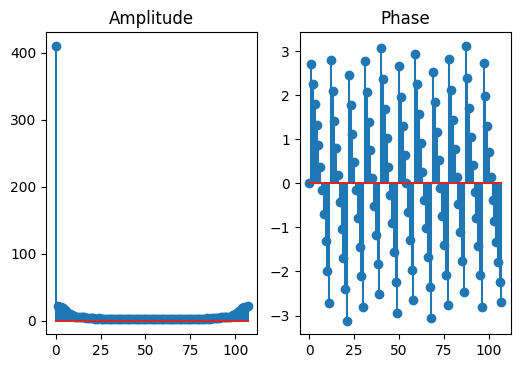

In [38]:
for _ in range(108-48-12):
    n_list.append(0)

n_list_2 = [4*(1-n) for n in n_list]

dft = np.fft.fft(n_list_2)

n_range = list(range(len(dft)))

amplitude = [np.abs(n) for n in dft]
phase = [np.angle(n) for n in dft]

fig, axs = plt.subplots(1, 2)
axs[0].stem(n_range, amplitude)
axs[0].title.set_text("Amplitude")
axs[1].stem(n_range, phase)
axs[1].title.set_text("Phase")

plt.rcParams["figure.dpi"] = 100


Dodawanie kolejnych zer zwiększa rozdzielczość Dyskretnej Transformaty Fouriera, jest to co prawda porządane zjawisko, lecz kosztuje nas czas / moc obliczeniową więc musimy na to zwracać uwagę przy dobieraniu liczby zer.

---

# Zadanie 4

Dany jest sygnał rzeczywisty $s(t) = A_1(2 \pi f_1 t) + A_2(2 \pi f_2 t) + A_3(2 \pi f_3 t)$, gdzie $A_1 = 0.1$, $f_1 = 3000Hz$, $A_2 = 0.7$, $f_2 = 8000 Hz$, $A_3 = 0.9$, $f_3 = 11000 Hz$. Przy założeniu, że liczba próbek sygnału wynosi $N_1 = 2048$, przedstawić wykres widmowej gęstości mocy sygnału $s(t)$. Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma? Czy sytuacja uległaby zmianie dla liczby próbek $\displaystyle N_2 = \frac{3}{2}N_1$?

Częstotliwość próbkowania $= 48000 Hz$
Liczba sygnałów $= 2048$

Wyznaczam sygnał rzeczywisty $s(t)$ a następnie rysuję jego widmo gęstości mocy:

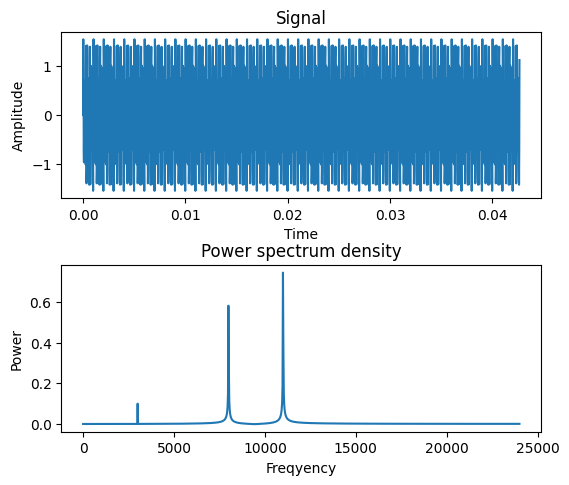

In [39]:
SAMPLING_FREQUENCY = 48_000
SAMPLING_INTERVAL = 1 / SAMPLING_FREQUENCY
N = 2048
FREQUENCY_STEP = SAMPLING_FREQUENCY / N

start_time = 0
end_time = (N - 1)*SAMPLING_INTERVAL

s1_frequency = 3_000
s2_frequency = 8_000
s3_frequency = 11_000

time_breaks = [start_time + x*(end_time-start_time) / (N-1) for x in range(N)]

frequencies = [x*((N-1)*FREQUENCY_STEP) / (N-1) for x in range(N)][:int(N/2)+1]

s1_amplitude = [0.1*sin(2*pi*s1_frequency*x) for x in time_breaks]
s2_amplitude = [0.7*sin(2*pi*s2_frequency*x) for x in time_breaks]
s3_amplitude = [0.9*sin(2*pi*s3_frequency*x) for x in time_breaks]

fig, axs = plt.subplots(2)

amplitude = [s1_amplitude[n] + s2_amplitude[n] + s3_amplitude[n]
             for n in range(len(s1_amplitude))]

dft_power = 2*(np.abs(np.fft.fft(amplitude)) / N)[:int(N/2)+1]

axs[0].plot(time_breaks, amplitude)
axs[0].title.set_text("Signal")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Amplitude")

axs[1].plot(frequencies, dft_power[:len(frequencies)])
axs[1].title.set_text("Power spectrum density")
axs[1].set_xlabel("Freqyency")
axs[1].set_ylabel("Power")

plt.subplots_adjust(left=0.1,
                    bottom=0.0,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)


Widać prążki dla częstotliwości 3000, 8000 i 11000 Hz. Lecz czy w takim razie nie dochodzi do przecieku? Powtórzmy rysunek z zaznaczeniem punktów na dolnym wykresie.

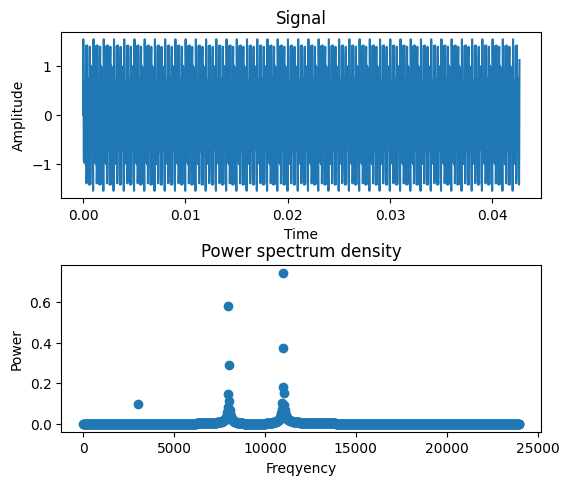

In [40]:
fig, axs = plt.subplots(2)

axs[0].plot(time_breaks, amplitude)
axs[0].title.set_text("Signal")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Amplitude")

axs[1].plot(frequencies, dft_power[:len(frequencies)], "o")
axs[1].title.set_text("Power spectrum density")
axs[1].set_xlabel("Freqyency")
axs[1].set_ylabel("Power")

plt.subplots_adjust(left=0.1,
                    bottom=0.0,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)

Teraz widać, że dochodzi do przecieków widma. ponieważ są nie trzy kropki (prążki) tylko kilkanaście.

Dzieje się tak ponieważ rozdzielczość częstotliwości = 48_000 / 2048 = 23.43. Więc w przypadku 3000 Hz:
 - 3000 / 23.43 = ~128 (jest to wielokrotność)

Natomiast dla 8 i 11 tysięcy nie ma wielokrotności:
- 8000 / 23.43 = 341,44
- 11000 / 23.43 = 469.48

Sprawdźmy zachowanie przy założeniu $\displaystyle N_2 = \frac{3}{2}N_1$


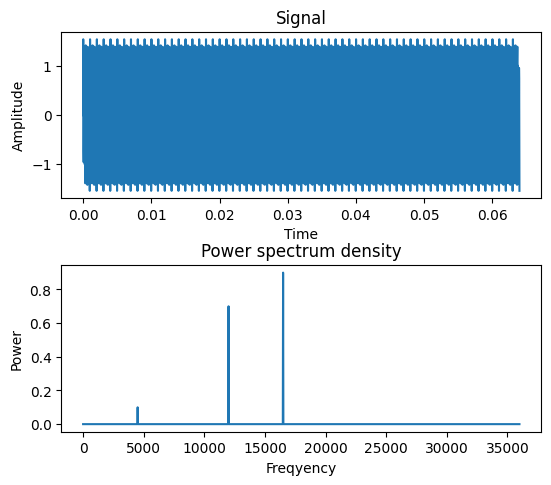

In [41]:
N *= 3/2
N = int(N)

end_time = (N - 1)*SAMPLING_INTERVAL

time_breaks = [start_time + x*(end_time-start_time) / (N-1) for x in range(N)]

frequencies = [x*((N-1)*FREQUENCY_STEP) / (N-1) for x in range(N)][:int(N/2)+1]

s1_amplitude = [0.1*sin(2*pi*s1_frequency*x) for x in time_breaks]
s2_amplitude = [0.7*sin(2*pi*s2_frequency*x) for x in time_breaks]
s3_amplitude = [0.9*sin(2*pi*s3_frequency*x) for x in time_breaks]

fig, axs = plt.subplots(2)

amplitude = [s1_amplitude[n] + s2_amplitude[n] + s3_amplitude[n]
             for n in range(len(s1_amplitude))]

dft_power = 2*(np.abs(np.fft.fft(amplitude)) / N)[:int(N/2)+1]

axs[0].plot(time_breaks, amplitude)
axs[0].title.set_text("Signal")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Amplitude")

axs[1].plot(frequencies, dft_power[:len(frequencies)])
axs[1].title.set_text("Power spectrum density")
axs[1].set_xlabel("Freqyency")
axs[1].set_ylabel("Power")

plt.subplots_adjust(left=0.1,
                    bottom=0.0,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)


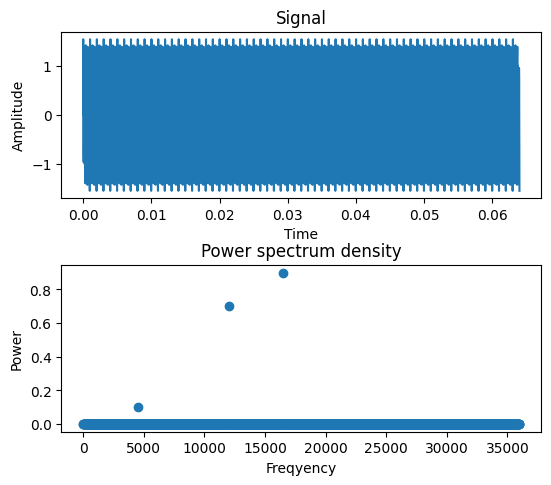

In [42]:
fig, axs = plt.subplots(2)

amplitude = [s1_amplitude[n] + s2_amplitude[n] + s3_amplitude[n]
             for n in range(len(s1_amplitude))]

dft_power = 2*(np.abs(np.fft.fft(amplitude)) / N)[:int(N/2)+1]

axs[0].plot(time_breaks, amplitude)
axs[0].title.set_text("Signal")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Amplitude")

axs[1].plot(frequencies, dft_power[:len(frequencies)], "o")
axs[1].title.set_text("Power spectrum density")
axs[1].set_xlabel("Freqyency")
axs[1].set_ylabel("Power")

plt.subplots_adjust(left=0.1,
                    bottom=0.0,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)


Teraz widzimy trzy, czyste prążki. Dzieje się tak ponieważ:
$N_2 = \frac{3}{2}N_1 = 3072$
Więc 48000 / 3072 = 15.625 Hz z czego możemy policzyć:
- 3000 / 15.625 = 192
- 8000 / 15.625 = 512
- 11000 / 15.625 = 704

Jak widać, wszędzie występują wielokrotności, dzięki czemu Dyskretna Transformata Fouriera trafia w częstotliwości składowe.